In [36]:
import numpy as np
import pandas as pd
from sklearn.metrics import  classification_report,confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt
train=pd.read_csv("glass.csv")

#print (td)
test=pd.read_csv("testglass.csv")


In [3]:
train.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [4]:
train.isnull().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [15]:
train.describe()

RI          Na          Mg          Al          Si           K  \
count  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000   
mean     1.518284   13.331059    2.842529    1.430941   72.680294    0.477235   
std      0.003116    0.794145    1.308525    0.454111    0.758618    0.341748   
min      1.511310   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516450   12.860000    2.712500    1.192500   72.380000    0.175000   
50%      1.517620   13.240000    3.480000    1.355000   72.840000    0.560000   
75%      1.518712   13.745000    3.607500    1.570000   73.100000    0.610000   
max      1.533930   15.790000    4.490000    3.500000   75.180000    2.700000   

               Ca          Ba          Fe        Type  
count  170.000000  170.000000  170.000000  170.000000  
mean     8.918882    0.131471    0.052882    2.541176  
std      1.451600    0.429823    0.088662    1.991419  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.220000    0.000000    0.000000    1.000000  
50%      8.550000    0.000000    0.000000    2.000000  
75%      9.055000    0.000000    0.097500    2.000000  
max     16.190000    3.150000    0.340000    7.000000

In [43]:
plt.plot(train)

In [6]:
features=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
X_train=train[list(features)].values
#print (X_train)
Y_train=train['Type'].values
#print (Y_train)
X_test=test[list(features)].values
#print (X_test)
Y_test=test['Type'].values
#print (Y_test)

In [69]:
#x=preprocessing.scale(td)
x=preprocessing.MinMaxScaler()
#x=preprocessing.MaxAbsScaler()
nor=x.fit_transform(X_train)
td=pd.DataFrame(nor)


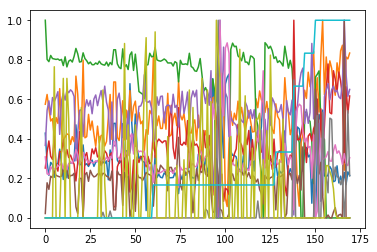

In [65]:
plt.plot(td)

In [66]:
y=preprocessing.MinMaxScaler()
#y=preprocessing.MaxAbsScaler()
nor1=y.fit_transform(X_test)
td1=pd.DataFrame(nor1)

In [70]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear',C=1).fit(td, Y_train)
svm_predictions = svm_model_linear.predict(td1)
accuracy = svm_model_linear.score(td1, Y_test)
print (accuracy)
cm = confusion_matrix(Y_test, svm_predictions)
print (classification_report(Y_test,svm_predictions))

0.5454545454545454
             precision    recall  f1-score   support

          1       0.48      1.00      0.65        10
          2       0.27      0.38      0.32         8
          3       0.00      0.00      0.00         7
          5       1.00      0.29      0.44         7
          6       0.00      0.00      0.00         3
          7       0.90      1.00      0.95         9

avg / total       0.50      0.55      0.47        44



/home/anie/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
from sklearn import linear_model
svm_model_linear = linear_model.SGDClassifier().fit(nor,Y_train)
svm_predictions = svm_model_linear.predict(nor1)
accuracy = svm_model_linear.score(nor1, Y_test)
print (accuracy)
cm = confusion_matrix(Y_test, svm_predictions)
print (classification_report(Y_test,svm_predictions))


0.45454545454545453
             precision    recall  f1-score   support

          1       0.40      1.00      0.57        10
          2       0.00      0.00      0.00         8
          3       0.00      0.00      0.00         7
          5       0.00      0.00      0.00         7
          6       0.67      0.67      0.67         3
          7       1.00      0.89      0.94         9

avg / total       0.34      0.45      0.37        44



/home/anie/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/anie/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, Y_train)
dtree_predictions = dtree_model.predict(X_test)
cm = confusion_matrix(Y_test, dtree_predictions)
print (cm)
accuracy=dtree_model.score(X_test,Y_test)
print (accuracy)
print (classification_report(Y_test,dtree_predictions))
ncm= cm/cm.astype(np.float).sum(axis=1)
print (ncm)

[[9 0 0 0 0 1]
 [3 5 0 0 0 0]
 [4 3 0 0 0 0]
 [1 6 0 0 0 0]
 [2 1 0 0 0 0]
 [0 1 0 0 0 8]]
0.5
             precision    recall  f1-score   support

          1       0.47      0.90      0.62        10
          2       0.31      0.62      0.42         8
          3       0.00      0.00      0.00         7
          5       0.00      0.00      0.00         7
          6       0.00      0.00      0.00         3
          7       0.89      0.89      0.89         9

avg / total       0.35      0.50      0.40        44

[[0.9        0.         0.         0.         0.         0.11111111]
 [0.3        0.625      0.         0.         0.         0.        ]
 [0.4        0.375      0.         0.         0.         0.        ]
 [0.1        0.75       0.         0.         0.         0.        ]
 [0.2        0.125      0.         0.         0.         0.        ]
 [0.         0.125      0.         0.         0.         0.88888889]]


/home/anie/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
from sklearn.ensemble import RandomForestClassifier
dtree_model = RandomForestClassifier(max_depth = 2).fit(X_train, Y_train)
dtree_predictions = dtree_model.predict(X_test)
cm = confusion_matrix(Y_test, dtree_predictions)
print (cm)
accuracy=dtree_model.score(X_test,Y_test)
print (accuracy)
print (classification_report(Y_test,dtree_predictions))
ncm= cm/cm.astype(np.float).sum(axis=1)
print (ncm)

[[10  0  0  0  0  0]
 [ 3  5  0  0  0  0]
 [ 4  3  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  2  0  0  0  1]
 [ 0  1  0  0  0  8]]
0.5227272727272727
             precision    recall  f1-score   support

          1       0.59      1.00      0.74        10
          2       0.28      0.62      0.38         8
          3       0.00      0.00      0.00         7
          5       0.00      0.00      0.00         7
          6       0.00      0.00      0.00         3
          7       0.89      0.89      0.89         9

avg / total       0.37      0.52      0.42        44

[[1.         0.         0.         0.         0.         0.        ]
 [0.3        0.625      0.         0.         0.         0.        ]
 [0.4        0.375      0.         0.         0.         0.        ]
 [0.         0.875      0.         0.         0.         0.        ]
 [0.         0.25       0.         0.         0.         0.11111111]
 [0.         0.125      0.         0.         0.         0.88888889]]


/home/anie/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
###generating learning model

In [30]:
from sklearn.naive_bayes import BernoulliNB
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.naive_bayes import GaussianNB
gnb = BernoulliNB().fit(X_train, Y_train)
#gnb = MultinomialNB().fit(X_train, Y_train)
#gnb = GaussianNB().fit(X_train, Y_train)
gnb_predictions = gnb.predict(X_test)
accuracy = gnb.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(Y_test, gnb_predictions)
print (cm)

0.3409090909090909
[[2 7 0 0 1 0]
 [4 4 0 0 0 0]
 [4 3 0 0 0 0]
 [0 7 0 0 0 0]
 [0 0 0 0 0 3]
 [0 0 0 0 0 9]]


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski').fit(X_train, Y_train)
knn_predictions = knn.predict(X_test)
accuracy = knn.score(X_test, Y_test)
print (accuracy)
print (classification_report(Y_test,knn_predictions))

0.5227272727272727
             precision    recall  f1-score   support

          1       0.48      1.00      0.65        10
          2       0.36      0.50      0.42         8
          3       0.00      0.00      0.00         7
          5       0.00      0.00      0.00         7
          6       0.00      0.00      0.00         3
          7       0.75      1.00      0.86         9

avg / total       0.33      0.52      0.40        44



/home/anie/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
from xgboost import XGBClassifier
xgb_data=XGBClassifier().fit(X_train,Y_train)
xgb_predictions = xgb_data.predict(X_test)
accuracy = xgb_data.score(X_test, Y_test)
print (accuracy)
cm = confusion_matrix(Y_test, xgb_predictions)
#print (cm)
print (classification_report(Y_test,xgb_predictions))


0.5909090909090909
             precision    recall  f1-score   support

          1       0.58      0.70      0.64        10
          2       0.38      1.00      0.55         8
          3       1.00      0.14      0.25         7
          5       1.00      0.14      0.25         7
          6       0.00      0.00      0.00         3
          7       1.00      1.00      1.00         9

avg / total       0.72      0.59      0.53        44



/home/anie/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anie/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anie/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
###predictive learning model

In [47]:
from sklearn.linear_model import LogisticRegression
log_data=LogisticRegression().fit(X_train,Y_train)
log_predictions = log_data.predict(X_test)
accuracy = log_data.score(X_test, Y_test)
print (accuracy)
cm = confusion_matrix(Y_test, log_predictions)
#print (cm)
print (classification_report(Y_test,log_predictions))


0.5454545454545454
             precision    recall  f1-score   support

          1       0.59      1.00      0.74        10
          2       0.38      0.62      0.48         8
          3       0.00      0.00      0.00         7
          5       0.00      0.00      0.00         7
          6       0.00      0.00      0.00         3
          7       0.64      1.00      0.78         9

avg / total       0.34      0.55      0.42        44



/home/anie/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
